# Imports

In [1]:
import numpy as np
import netCDF4
import h5netcdf
import xarray as xr
import pandas as pd
import sys
import tensorflow as tf
from tensorflow import keras
import pickle
from os.path import join
sys.path.append('/home/samuel.varga/projects/deep_learning/')
from deep_learning.training_utils import load_rotation
import seaborn as sns
import matplotlib.pyplot as plt

2023-12-24 18:38:07.793053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-24 18:38:07.966258: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Load Data

In [2]:
target_column = ['any_severe__36km','hail_severe__36km','wind_severe__36km','tornado_severe__36km']
X_test, y_test = load_rotation(join('/work/samuel.varga/data/2to6_hr_severe_wx/DEEP_LEARNING/',f'wofs_dl_severe__2to6hr__testing_data'), None, target_column)
y_test_no_mesh = np.add.reduce([y_test[k] for k in list(y_test.keys())[1:]])
y_test_no_mesh[y_test_no_mesh > 0] = 1
y_test = y_test['any_severe__36km']

# Load Model Data

In [3]:
out_path = '/work/samuel.varga/projects/2to6_hr_severe_wx/DEEP_LEARNING/results/'
result_path = f'{target_column[0]}_Rot_0_16_16_lrate_0.0001_spatial_dropout_0.1_filters_[64, 128, 256, 512]_size_[2, 1, 2, 1]_pool_[2, 2, 2, 2]_results.pkl'
results = pd.read_pickle(join(out_path, result_path))
y_pred = results['predict_test']

# Plot Patches 

In [4]:
def plot_predictions(inds, y, y_hat, title=None, threshold=None):
    '''Plots 10 Patches
    Inds: indices of patches
    y - testing dataset
    y_hat - U-net prediction on testing dataset'''
    if threshold:
        y_hat = np.ma.array(y_hat, mask = y_hat<threshold)
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(11,12), sharex='col', sharey='row')
    for a, ind in zip(ax[:,0], inds):
        a.pcolormesh(y[ind], vmin=0, vmax=1, edgecolors='k', linewidth=0.1, cmap='ocean_r')
    for a, ind in zip(ax[:,2], inds):
        a.pcolormesh(y_hat[ind], vmin=0, vmax=1, cmap='hot_r')
        a.contour(y[ind], levels=[0,1], colors='k', linewidths=0.5, extend='max')
    for a, ind in zip(ax[:,1], inds[5:]):
        a.pcolormesh(y[ind], vmin=0, vmax=1, cmap='ocean_r', edgecolors='k', linewidth=0.1)
    for a, ind in zip(ax[:,3], inds[5:]):
        im =  a.pcolormesh(y_hat[ind], vmin=0, vmax=1, cmap='hot_r')
        a.contour(y[ind], levels=[0, 1], colors=['k'], linewidths=0.5, extend='max')
    ax[0,0].set_title(f'Target Maps{": " if title else ""}{title if title else ""}', x=1.25)
    ax[0,2].set_title('U-Net Predictions', x=1.25)
    cb_ax = fig.add_axes([0.82,0.48,0.1,0.5]); cb_ax.set_axis_off()
    plt.colorbar(im, ax = cb_ax, orientation='vertical')
    plt.show()

In [5]:
#Select 10 patches
#inds = np.random.RandomState(45).choice(len(y_pred), 10, replace=False)
inds=[3008,871, 3137,2422,2398,1814,2588, 1451, 291, 954 ]

# Any-Severe

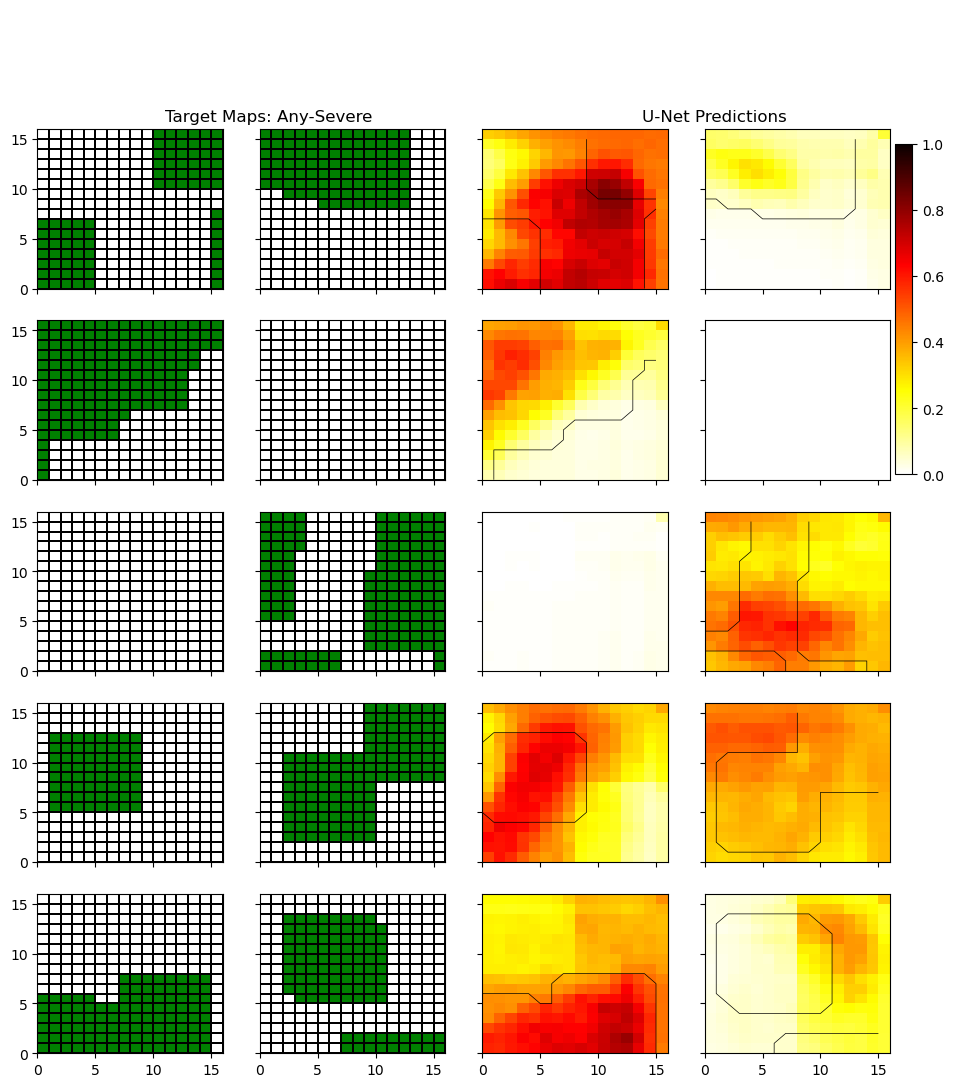

In [6]:
plot_predictions(inds, y_test, np.squeeze(y_pred), title='Any-Severe')

# Severe Wind

In [7]:
target_column = 'wind_severe__36km'
X_test, y_test_wind = load_rotation(join('/work/samuel.varga/data/2to6_hr_severe_wx/DEEP_LEARNING/',f'wofs_dl_severe__2to6hr__testing_data'), None, target_column)
result_path = f'{target_column}_Rot_0_16_16_lrate_0.0001_spatial_dropout_0.1_filters_[64, 128, 256, 512]_size_[2, 1, 2, 1]_pool_[2, 2, 2, 2]_results.pkl'
results = pd.read_pickle(join(out_path, result_path))
y_pred_wind = results['predict_test']

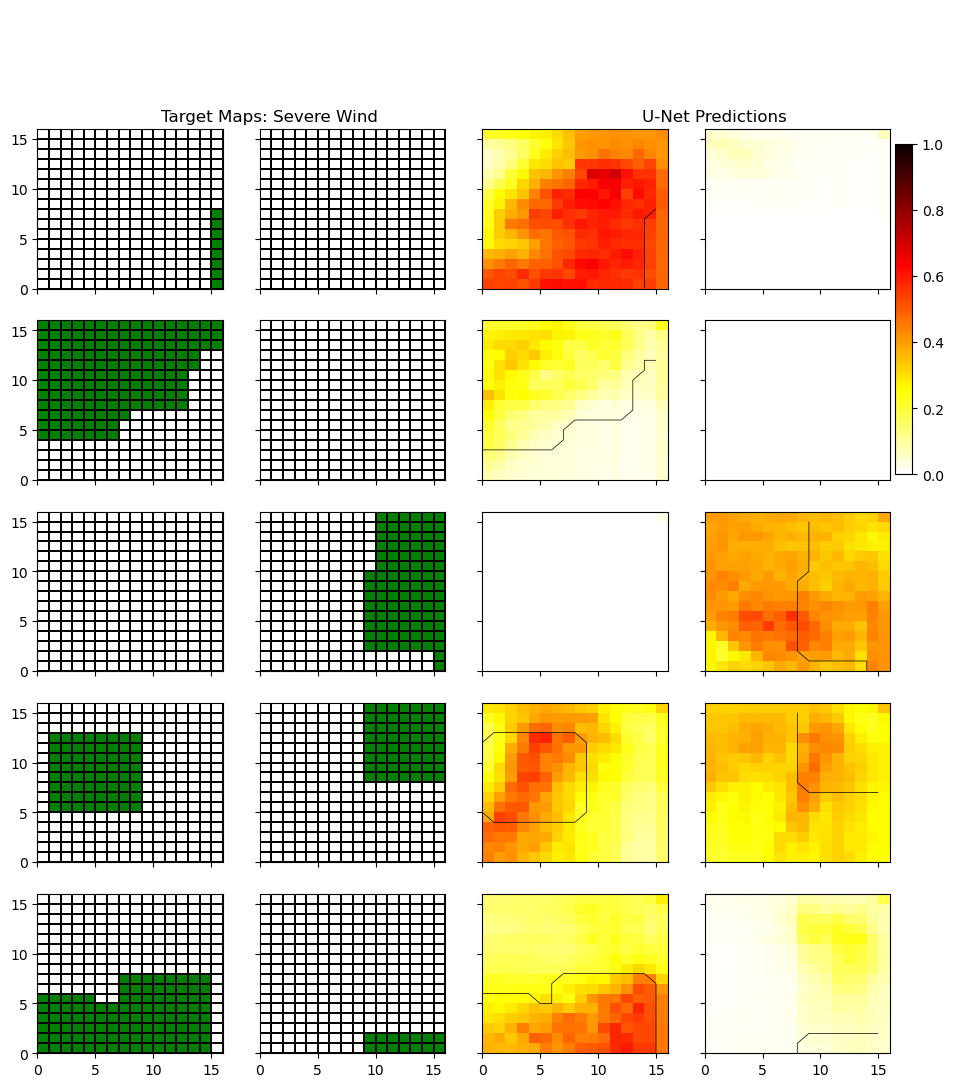

In [8]:
plot_predictions(inds, y_test_wind, np.squeeze(y_pred_wind), title='Severe Wind')

# Severe Hail

In [9]:
target_column = 'hail_severe__36km'
X_test, y_test_hail = load_rotation(join('/work/samuel.varga/data/2to6_hr_severe_wx/DEEP_LEARNING/',f'wofs_dl_severe__2to6hr__testing_data'), None, target_column)
result_path = f'{target_column}_Rot_0_16_16_lrate_0.0001_spatial_dropout_0.1_filters_[64, 128, 256, 512]_size_[2, 1, 2, 1]_pool_[2, 2, 2, 2]_results.pkl'
results = pd.read_pickle(join(out_path, result_path))
y_pred_hail = results['predict_test']

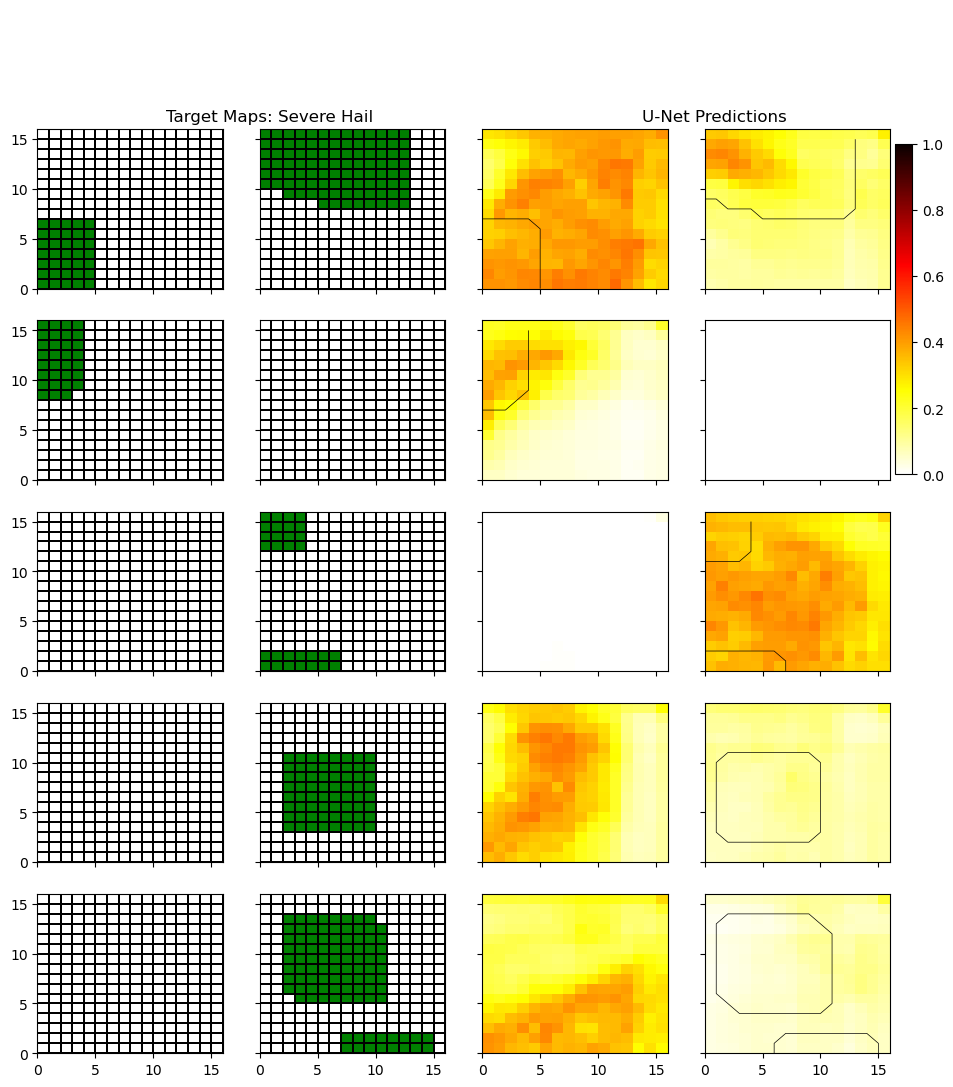

In [10]:
plot_predictions(inds, y_test_hail, np.squeeze(y_pred_hail), title='Severe Hail')